# Pandas 3
    Ethan Crawford
    Math 403
    9/19/23

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [57]:
def prob1():
    """
    Use a groupby object to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    # Read in the college data and group by 'Private'
    college_group = pd.read_csv("college.csv", header=0, index_col=0).groupby(['Private'])

    # Get the describe arrays for 'S.F.Ratio', 'Top10perc', and 'Top25perc'
    public_describe = college_group.get_group('No').describe()[['S.F.Ratio', 'Top10perc', 'Top25perc']]
    private_describe = college_group.get_group('Yes').describe()[['S.F.Ratio', 'Top10perc', 'Top25perc']]
    
    # Label the describe arrays
    public_sfratio = public_describe['S.F.Ratio']
    public_top10perc = public_describe['Top10perc']
    public_top25perc = public_describe['Top25perc']

    private_sfratio = private_describe['S.F.Ratio']
    private_top10perc = private_describe['Top10perc']
    private_top25perc = private_describe['Top25perc']

    # Get the answers
    ans_1 = public_sfratio if public_sfratio['mean'] > private_sfratio['mean'] else private_sfratio
    ans_2 = public_top10perc if public_top10perc['mean'] > private_top10perc['mean'] else private_top10perc
    ans_3 = public_top25perc if public_top25perc['mean'] > private_top25perc['mean'] else private_top25perc

    return ans_1, ans_2, ans_3
prob1()

(count    212.000000
 mean      17.139151
 std        3.418049
 min        6.700000
 25%       15.100000
 50%       17.250000
 75%       19.325000
 max       28.800000
 Name: S.F.Ratio, dtype: float64,
 count    565.000000
 mean      29.330973
 std       17.851391
 min        1.000000
 25%       17.000000
 50%       25.000000
 75%       36.000000
 max       96.000000
 Name: Top10perc, dtype: float64,
 count    565.000000
 mean      56.957522
 std       19.588360
 min        9.000000
 25%       42.000000
 50%       55.000000
 75%       70.000000
 max      100.000000
 Name: Top25perc, dtype: float64)

# Problem 2

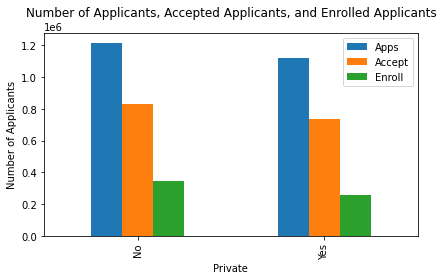

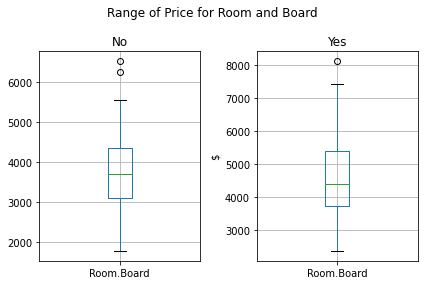

In [58]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    # Read in the college data and group by 'Private'
    college_group = pd.read_csv("college.csv", header=0, index_col=0).groupby(['Private'])

    # Get the number of applicants, accept applicants, and enrolled applicants
    college_group[['Apps', 'Accept', 'Enroll']].sum().plot.bar()
    plt.title("Number of Applicants, Accepted Applicants, and Enrolled Applicants")
    plt.ylabel("Number of Applicants")
    plt.tight_layout()

    # Get the range of price for room and board
    college_group[['Room.Board']].boxplot(sharey=False)
    plt.ylabel("$")
    plt.suptitle("Range of Price for Room and Board")
    plt.tight_layout()
prob2()

# Problem 3

In [56]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination has the highest Usual Weekly 
            Earnings in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week 
            per person?
    Note: Hard coding is okay as long as there is code that makes sense for each problem.
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    # Read in the data
    ohio = pd.read_csv("Ohio_1999.csv")

    # Create a pivot table for the first question
    ans_1_table = ohio.pivot_table(values="Usual Hours Worked", index="Race", columns="Sex", aggfunc='max')
    ans_1 = tuple(ans_1_table.stack().idxmax())

    # Create a pivot table for the second question
    ans_2_table = ohio.pivot_table(values="Usual Hours Worked", index="Race", columns="Sex", aggfunc='sum')
    ans_2 = tuple(ans_2_table.stack().idxmin())

    # Create a pivot table for the third question
    ans_3_table = ohio.pivot_table(values="Usual Hours Worked", index="Race", columns="Sex", aggfunc='mean')
    ans_3 = tuple(ans_3_table.stack().idxmax())

    return ans_1, ans_2, ans_3

prob3()

((1, 1), (3, 2), (3, 1))

# Problem 4

In [113]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    # Read in the data
    ohio = pd.read_csv("Ohio_1999.csv")

    # Partition the data into intervals and find the greatest group of education level
    edu_bins = pd.cut(ohio['Educational Attainment'], [0,39,43,ohio['Educational Attainment'].max()]).describe()
    ans_1 = edu_bins['top']

    # Partition the Age column into 6 equally-sized groups using pd.qcut(). Which interval
    # has the highest average Usual Hours Worked?
    ans_2_table = pd.concat([pd.DataFrame(pd.qcut(ohio['Age'], 6)),
                              ohio['Usual Hours Worked']], axis=1)
    ans_2 = ans_2_table.groupby('Age').mean().idxmax()['Usual Hours Worked']
    
    # Using the partitions from the first two parts, what age/degree combination has the lowest
    # yearly salary on average?
    ans_3_table = pd.concat([
                             ohio, 
                             pd.DataFrame(pd.qcut(ohio['Age'], 6), columns=['Age']).rename(columns={'Age':'Age Group'}), 
                             pd.DataFrame(pd.cut(ohio['Educational Attainment'], [0,39,43,ohio['Educational Attainment'].max()]), columns=['Educational Attainment']).rename(columns={'Educational Attainment':'Educational Attainment Group'})
                            ],axis=1)
   
    ans_3_piv_table = ans_3_table.pivot_table(values="Yearly Salary", index='Age Group', columns="Educational Attainment Group", aggfunc='mean')
    ans_3 = tuple(ans_3_piv_table.stack().idxmin())

    return ans_1, ans_2, ans_3

prob4()


(Interval(39, 43, closed='right'),
 Interval(40.0, 46.0, closed='right'),
 (Interval(15.999, 29.0, closed='right'), Interval(0, 39, closed='right')))

# Problem 5

In [115]:
def prob5():
   """
   Use College.csv to answer the following questions:
      1. Is there a partition in which the number of both 
         private and public universities does not increase 
         as the percentage of alumni that donates increases?
      2. Is the partition with the greatest number of schools 
         the same for private and public universities?
      3. Is it true that the partition that has the least 
         number of students from the top 10 percent of their 
         high school class that were admitted on average is 
         the same for both private and public universities?
      4. The average percentage of students admitted from the 
         top 10 percent of their high school class is very high
         in private universities with very low acceptance rates. 
         Why is this not a good conclusion to draw solely from 
         this dataset? Use only the data to explain why; do not 
         extrapolate.

   Returns:
      ans_1 (bool): answer to question 1
      ans_2 (bool): answer to question 2
      ans_3 (bool): answer to question 3
      ans_4 (str): answer to question 4
   """
   cut_points = [0, 20, 40, 60, 80, 100]
   # Read in data    
   college = pd.read_csv("college.csv")    
   college["Acceptance Rate"] = college["Accept"] / college["Apps"]     
   # Question 1. Partition perc.alumni into evenly spaced intervals    
   # of 20%. Is there a partition in which the number of both private 
   # and public universities does not increase as the percentage of 
   # alumni that donates increases?    
   college['alumni_donate'] = pd.cut(college['perc.alumni'], cut_points)    
   alumni_group = college.groupby(['alumni_donate', 'Private'])    
   
   ans_1 = True     
   
   # Question 2. Is the graduation rate partition the same between 
   # private and public schools?    
   priv_type = college.groupby('Private')    
   private, public = priv_type.get_group('No'), priv_type.get_group('Yes')    
   grad_priv = pd.cut(private["Grad.Rate"], cut_points)    
   grad_pub = pd.cut(public["Grad.Rate"], cut_points)   
   ans_2 = grad_priv.value_counts().idxmax() == grad_pub.value_counts().idxmax()

   # Question 3. Is there inverse correlation between acceptance rate and having students from top 10% of their class?
   college["Acceptance Rate"] = college["Accept"] / college["Apps"]
   college['Accpt Partition'] = pd.cut(college["Acceptance Rate"], [0, 0.25, 0.50, 0.75, 1.0])
   grouped = college.pivot_table(values='Top10perc', columns='Private', index='Accpt Partition', aggfunc='mean')
   ans_3 = True

   # Question 4. Why is the average percentage of students admitted from top10 so high in private unis with very low acceptance rates.
   accept_rate = pd.qcut(college["Acceptance Rate"], 4)
   q4_pt = college.pivot_table(values="Top10perc", index="Private", columns=[accept_rate], aggfunc="count")

   ans_4 = "Private Colleges with low acceptance rates have more top10perc students applying, and thus can choose more of them."

   return ans_1, ans_2, ans_3, ans_4

prob5()




(True,
 False,
 True,
 'Private Colleges with low acceptance rates have more top10perc students applying, and thus can choose more of them.')